In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io.wavfile import read
import scipy.signal as signal
from scipy.fftpack import fft

In [2]:
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

# Define the Bark scale conversion function
def hz2bark(f):
    """ Usage: Bark=hz2bark(f)
    f    : (ndarray)    Array containing frequencies in Hz.
    Returns  :
    Brk  : (ndarray)    Array containing Bark scaled values.
    """
    Brk = 6. * np.arcsinh(f/600.)
    return Brk

def bark2hz(Brk):
    """ Usage:
    Hz=bark2hs(Brk)
    Args     :
        Brk  : (ndarray)    Array containing Bark scaled values.
    Returns  :
        Fhz  : (ndarray)    Array containing frequencies in Hz.
    """

    Fhz = 600. * np.sinh(Brk/6.)
    return Fhz

Text(0, 0.5, 'Bark scale')

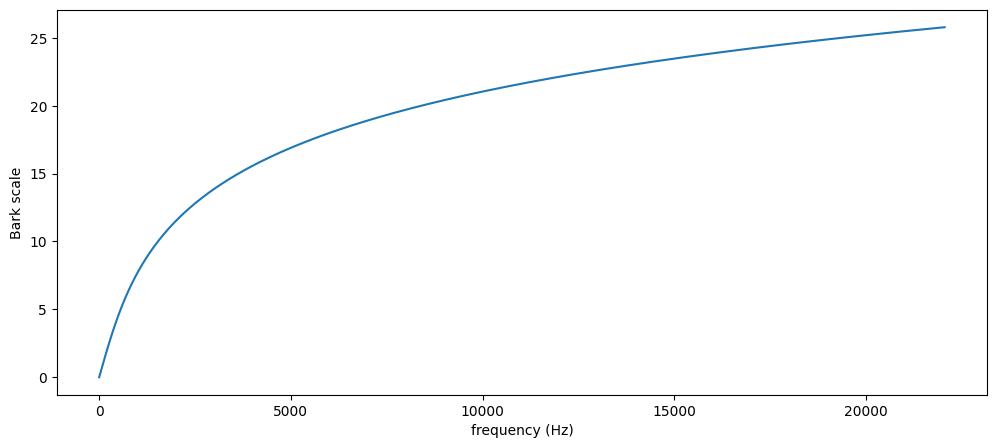

In [3]:
# compute and plot the bark scale

freqs = np.linspace(0,22050,512)
bark_scale = hz2bark(freqs)

# Plot the Bark scale
plt.figure(figsize=(12, 5))
plt.plot(freqs, bark_scale)
plt.xlabel("frequency (Hz)")
plt.ylabel("Bark scale")

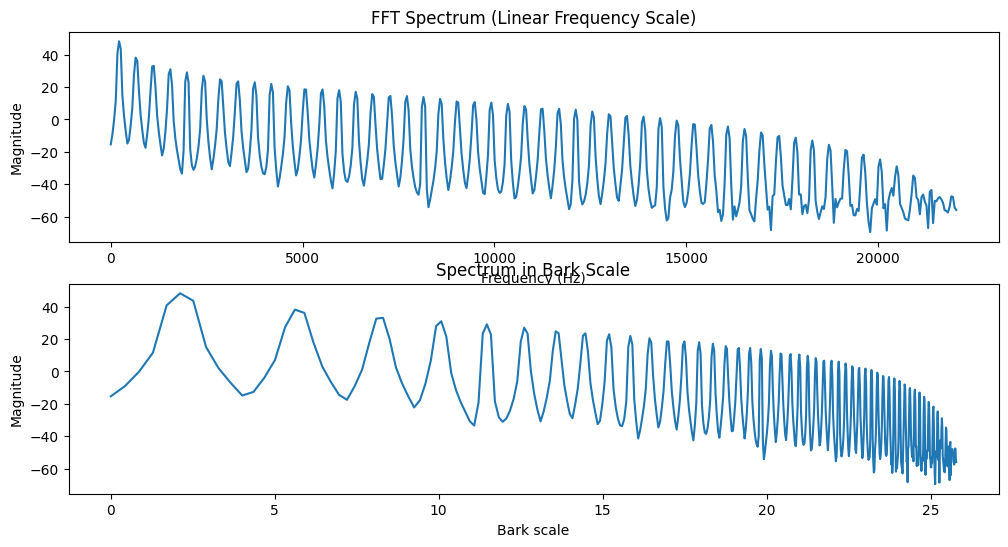

In [4]:
# plot the magnitude spectrum of a sound in the bark scale
x, fs = read_sound('../sounds/synthetic.wav')
N = 1024
x1 = x[10000:10000+N]

# compute the hanning window
w = signal.get_window('hann', N)
# compute the spectrum of the windowed input signal
spectrum = fft(w*x1)
# compute the magnitude spectrum in dB
magnitude_spectrum = 20*np.log10(abs(spectrum[:N//2]))

# Plot the original FFT and the Bark scale spectrum
plt.figure(figsize=(12, 6))

bark_scale = hz2bark(freqs)

plt.subplot(2, 1, 1)
frequency_indexes =np.linspace(0,fs/2, N//2)
plt.plot(frequency_indexes, magnitude_spectrum)
plt.title("FFT Spectrum (Linear Frequency Scale)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(2, 1, 2)
plt.plot(bark_scale, magnitude_spectrum)
plt.title("Spectrum in Bark Scale")
plt.xlabel("Bark scale")
plt.ylabel("Magnitude")

plt.show()
